In [12]:
#import dependencies and modules
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
us_county_df = pd.read_csv("US County Votes_FINAL.csv")
us_county_df.head()

,FIPS,County,State,Dem 2008-2016 (%),Rep 2008-2016 (%),Party 2008-2016,Uninsured,Total Population
0,1001.0,Autauga County,AL,25.5,73.2,Red,0.139,52077
1,1003.0,Baldwin County,AL,21.7,76.7,Red,0.166,177131
2,1005.0,Barbour County,AL,49.0,50.3,Split,0.189,28560
3,1007.0,Bibb County,AL,24.7,74.2,Red,0.160,22189
4,1009.0,Blount County,AL,11.8,86.8,Red,0.181,57063


In [14]:
#us_county_df.dropna(axis=1, how="all")
#del(us_county_df["Unnamed: 8"], us_county_df["Unnamed: 9"], us_county_df["Unnamed: 10"])

In [15]:
us_county_df["Pop Uninsured"] = us_county_df["Total Population"] * us_county_df["Uninsured"]
us_county_df["Percent Uninsured (%)"] = (us_county_df["Pop Uninsured"]/us_county_df["Total Population"]) * 100
us_county_df.head()

,FIPS,County,State,Dem 2008-2016 (%),Rep 2008-2016 (%),Party 2008-2016,Uninsured,Total Population,Pop Uninsured,Percent Uninsured (%)
0,1001.0,Autauga County,AL,25.5,73.2,Red,0.139,52077,7238.703,13.9
1,1003.0,Baldwin County,AL,21.7,76.7,Red,0.166,177131,29403.746,16.6
2,1005.0,Barbour County,AL,49.0,50.3,Split,0.189,28560,5397.840,18.9
3,1007.0,Bibb County,AL,24.7,74.2,Red,0.160,22189,3550.240,16.0
4,1009.0,Blount County,AL,11.8,86.8,Red,0.181,57063,10328.403,18.1


In [16]:
state_uni = us_county_df.groupby("State")["Pop Uninsured"].sum()
#print(state_uni)
state_pop = us_county_df.groupby("State")["Total Population"].sum()
#print(state_pop)
percent_state = (state_uni/state_pop) * 100
#print(round(percent_state))

In [17]:
#find unique string values and create list
states = us_county_df["State"].unique().tolist()

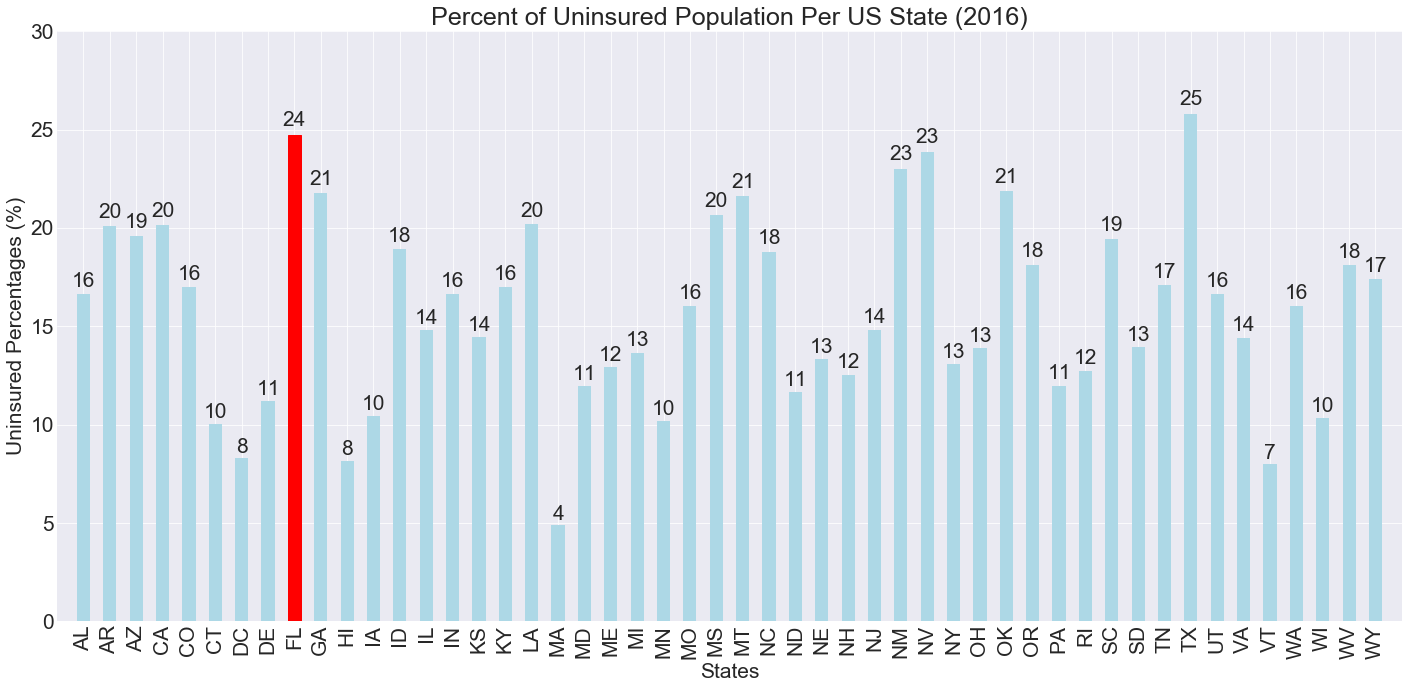

In [30]:
x_axis = np.arange(len(state_uni))
tick_locations = [value for value in x_axis]

#create bar chart
fig, ax = plt.subplots(figsize=(20,10))
rects = plt.bar(x_axis, percent_state, width=0.5, color="lightblue", align="center") 
plt.xlim([-1, x_axis.size]) #x-axis limit
plt.ylim(0, 30) #y-axis limit
plt.xticks(tick_locations, states, rotation="vertical")


#find and label the height of each bar in graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.01*height, '%d'%int(height),
                ha='center', va='bottom') #placement of text label above each bar
autolabel(rects)

#add title and axes labels
plt.title("Percent of Uninsured Population Per US State (2016)")
plt.xlabel("States")
plt.ylabel("Uninsured Percentages (%)")

#increase font of graph
plt.rcParams.update({'font.size': 21})

#aesthetics 
sns.set_style("darkgrid")
rects[8].set_color("r")

plt.tight_layout()
plt.savefig("US_Uninsured_Pop.png")
plt.show()

In [21]:
#locate counties in FL
florida = us_county_df.loc[us_county_df["State"] == "FL"]
florida.head()

,FIPS,County,State,Dem 2008-2016 (%),Rep 2008-2016 (%),Party 2008-2016,Uninsured,Total Population,Pop Uninsured,Percent Uninsured (%)
291,12001.0,Alachua County,FL,59.0,38.5,Blue,0.204,243163,49605.252,20.4
292,12003.0,Baker County,FL,19.3,79.6,Red,0.179,26296,4706.984,17.9
293,12005.0,Bay County,FL,27.2,70.8,Red,0.210,166151,34891.710,21.0
294,12007.0,Bradford County,FL,27.4,71.3,Red,0.200,28680,5736.000,20.0
295,12009.0,Brevard County,FL,41.8,56.1,Red,0.205,538036,110297.380,20.5


In [22]:
#counties that voted which way
florida["Party 2008-2016"].value_counts()

Red      51
Blue     10
Split     6
Name: Party 2008-2016, dtype: int64

In [24]:
#number of people in FL
total_pop = florida["Total Population"].sum()
print("total pop of FL: " + str(total_pop))

#number of people uninsured/insured in FL
uni_pop = florida["Pop Uninsured"].sum()
print("unisured pop of FL: " + str(uni_pop))

ins_pop = total_pop - uni_pop
print("insured pop of FL: " + str(ins_pop))
print("--------------------------------------------------------")
print("percent of uninsured pop in FL: " + str((uni_pop/total_pop) * 100) + "%")
print("percent of insured pop in FL: " + str((ins_pop/total_pop) * 100) + "%")

total pop of FL: 18511850
unisured pop of FL: 4578068.259999999
insured pop of FL: 13933781.740000002
--------------------------------------------------------
percent of uninsured pop in FL: 24.730474047704572%
percent of insured pop in FL: 75.26952595229544%


In [25]:
#create empty lists
dem_uni = []
dem_pop = []
rep_uni = []
rep_pop = []
split_uni = []
split_pop = []

dem_party = florida.loc[florida["Party 2008-2016"] == "Blue"]
dem_uni.append(dem_party["Pop Uninsured"])
dem_pop.append(dem_party["Total Population"])

rep_party = florida.loc[florida["Party 2008-2016"] == "Red"]
rep_uni.append(rep_party["Pop Uninsured"])
rep_pop.append(rep_party["Total Population"])

split_party = florida.loc[florida["Party 2008-2016"] == "Split"]
split_uni.append(split_party["Pop Uninsured"])
split_pop.append(split_party["Total Population"])

In [26]:
#uninsured pop in counties that voted blue
tdem_uni = sum(round(dem_uni[0]))
print("uninsured pop in blue county: " + str(tdem_uni))

tdem_pop = sum(round(dem_pop[0]))
print("total pop in blue county: " + str(tdem_pop))
print("--------------------------------------------------------")
print("percent uninsured in blue county: " + str((tdem_uni/tdem_pop)*100) + "%")
print("uninsured pop compared to the total pop of FL: " + str((tdem_uni/total_pop)*100) + "%")

uninsured pop in blue county: 2452123.0
total pop in blue county: 9020160
--------------------------------------------------------
percent uninsured in blue county: 27.1849168973%
uninsured pop compared to the total pop of FL: 13.2462341689%


In [27]:
#uninsured pop in counties that voted rep
trep_uni = sum(round(rep_uni[0]))
print("uninsured pop in red county: " + str(trep_uni))

trep_pop = sum(round(rep_pop[0]))
print("total pop in red county: " + str(trep_pop))
print("--------------------------------------------------------")
print("percent uninsured in red county: " + str((trep_uni/trep_pop)*100) + "%")
print("uninsured pop compared to the total pop of FL: " + str((trep_uni/total_pop)*100) + "%")

uninsured pop in red county: 1544459.0
total pop in red county: 6871283
--------------------------------------------------------
percent uninsured in red county: 22.4770104797%
uninsured pop compared to the total pop of FL: 8.34308294417%


In [28]:
#uninsured pop in counties that were split
tsplit_uni = sum(round(split_uni[0]))
print("uninsured pop in split county: " + str(tsplit_uni))

tsplit_pop = sum(round(split_pop[0]))
print("total pop in split county: " + str(tsplit_pop))
print("--------------------------------------------------------")
print("percent uninsured in split county: " + str((tsplit_uni/tsplit_pop)*100) + "%")
print("uninsured pop compared to the total pop of FL: " + str((tsplit_uni/total_pop)*100) + "%")

uninsured pop in split county: 581485.0
total pop in split county: 2620407
--------------------------------------------------------
percent uninsured in split county: 22.190636798%
uninsured pop compared to the total pop of FL: 3.14115012816%
